# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [50]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [51]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 601


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [52]:
import requests

# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid=--removedAPIkeyforsecurity"  

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ranchettes
Processing Record 2 of Set 1 | lompoc
Processing Record 3 of Set 1 | bredasdorp
Processing Record 4 of Set 1 | wailua homesteads
Processing Record 5 of Set 1 | lame
Processing Record 6 of Set 1 | puerto natales
Processing Record 7 of Set 1 | balnearia
Processing Record 8 of Set 1 | yanchep
Processing Record 9 of Set 1 | hithadhoo
Processing Record 10 of Set 1 | isafjordur
Processing Record 11 of Set 1 | hawaiian paradise park
Processing Record 12 of Set 1 | opuwo
Processing Record 13 of Set 1 | kununurra
Processing Record 14 of Set 1 | machico
Processing Record 15 of Set 1 | acarau
Processing Record 16 of Set 1 | prineville
Processing Record 17 of Set 1 | greymouth
Processing Record 18 of Set 1 | tazacorte
Processing Record 19 of Set 1 | port-aux-francais
Processing Record 20 of Set 1 | olonkinbyen
Processing Record 21 of Set 1 | tame
Processing Record 22 of Set 1 | albany
Processing R

In [53]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
record_count = city_data_df.shape[0]
print(f"Record Count: {record_count}")

Record Count: 570


In [54]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ranchettes,41.2186,-104.7903,275.96,72,100,2.06,US,1706070038
1,lompoc,34.6391,-120.4579,287.05,86,0,4.92,US,1706070016
2,bredasdorp,-34.5322,20.0403,291.12,85,22,5.84,ZA,1706070038
3,wailua homesteads,22.0669,-159.3780,298.39,78,75,8.23,US,1706070038
4,lame,10.4415,9.2396,289.29,17,6,0.60,NG,1706070039


In [55]:
# Export the City_Data into a csv
city_data_df.to_csv("C:\\Users\\emily\\OneDrive\\Desktop\\python_api_challenge\\starter_code\\cities.csv", index_label="City_ID")


In [56]:
# Read saved data
city_data_df = pd.read_csv("C:\\Users\\emily\\OneDrive\\Desktop\\python_api_challenge\\starter_code\\cities.csv")

# Set the "City_ID" column as the index
city_data_df.set_index("City_ID", inplace=True)

# Display sample data
city_data_df.head()



,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ranchettes,41.2186,-104.7903,275.96,72,100,2.06,US,1706070038
1,lompoc,34.6391,-120.4579,287.05,86,0,4.92,US,1706070016
2,bredasdorp,-34.5322,20.0403,291.12,85,22,5.84,ZA,1706070038
3,wailua homesteads,22.0669,-159.3780,298.39,78,75,8.23,US,1706070038
4,lame,10.4415,9.2396,289.29,17,6,0.60,NG,1706070039


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

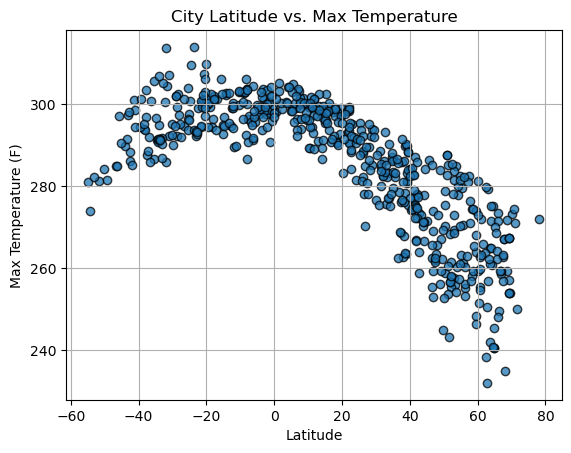

In [57]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black", alpha=0.75)

# Incorporate other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

# Save the figure
plt.savefig(r"C:\Users\emily\OneDrive\Desktop\python_api_challenge\output_data\Fig1.png")


# Show plot
plt.show()


#### Latitude Vs. Humidity

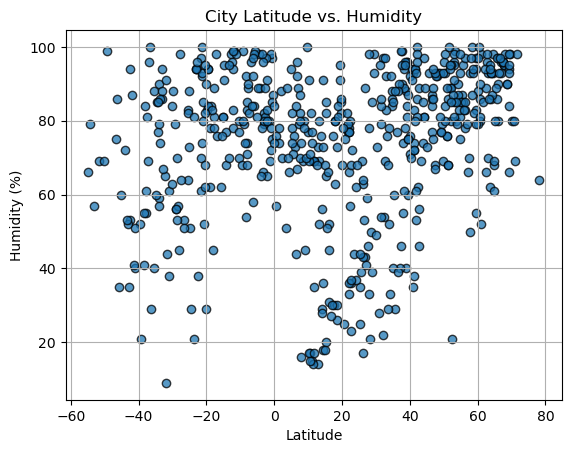

In [58]:
# Build scatter plot for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black", alpha=0.75)


# Incorporate other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)


# Save the figure
plt.savefig(r"C:\Users\emily\OneDrive\Desktop\python_api_challenge\output_data\Fig2.png")


# Show plot
plt.show()


#### Latitude Vs. Cloudiness

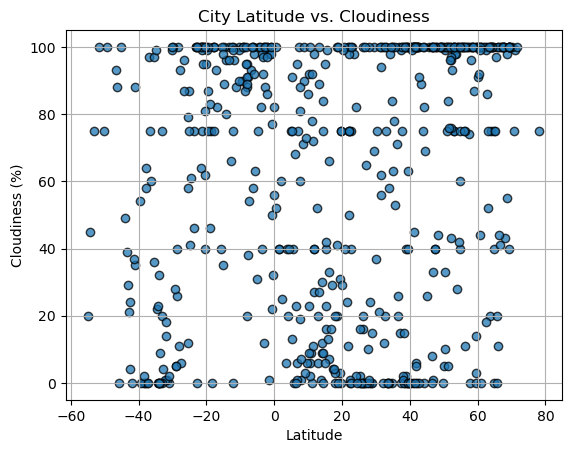

In [59]:
# Build scatter plot for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black", alpha=0.75)

# Incorporate other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig(r"C:\Users\emily\OneDrive\Desktop\python_api_challenge\output_data\Fig3.png")


# Show plot
plt.show()


#### Latitude vs. Wind Speed Plot

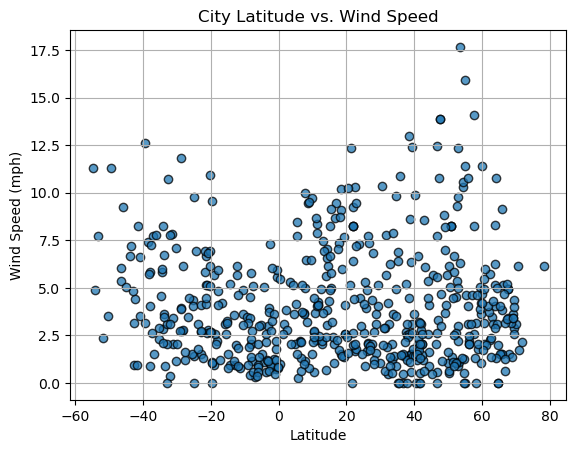

In [60]:
# Build scatter plot for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black", alpha=0.75)

# Incorporate other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Save the figure
plt.savefig(r"C:\Users\emily\OneDrive\Desktop\python_api_challenge\output_data\Fig4.png")


# Show plot
plt.show()


---

## Requirement 2: Compute Linear Regression for Each Relationship


In [63]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = pd.DataFrame(city_data)
northern_hemi_df = northern_hemi_df[northern_hemi_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ranchettes,41.2186,-104.7903,275.96,72,100,2.06,US,1706070038
1,lompoc,34.6391,-120.4579,287.05,86,0,4.92,US,1706070016
3,wailua homesteads,22.0669,-159.3780,298.39,78,75,8.23,US,1706070038
4,lame,10.4415,9.2396,289.29,17,6,0.60,NG,1706070039
9,isafjordur,66.0755,-23.1240,273.46,90,100,5.17,IS,1706070039


In [64]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = pd.DataFrame(city_data)
southern_hemi_df = southern_hemi_df[southern_hemi_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,bredasdorp,-34.5322,20.0403,291.12,85,22,5.84,ZA,1706070038
5,puerto natales,-51.7236,-72.4875,281.21,69,100,2.35,CL,1706070039
6,balnearia,-31.0088,-62.6673,292.27,61,0,3.43,AR,1706070039
7,yanchep,-31.5500,115.6833,304.27,44,1,7.82,AU,1706070039
8,hithadhoo,-0.6000,73.0833,301.82,75,77,5.55,MV,1706070039


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.7173231392902331


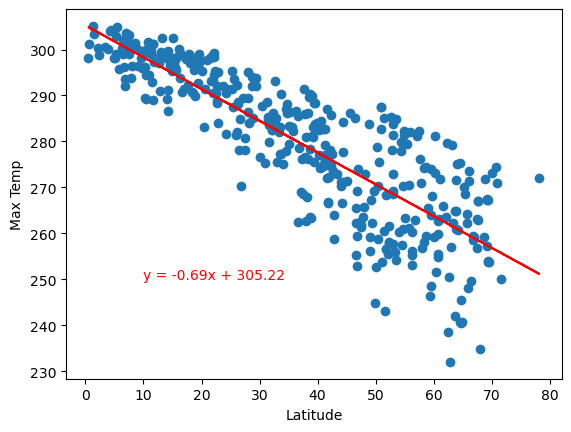

In [65]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

#Performing Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plotting the scatter plot and regression line
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

#Adding labels, title and annotation
plt.annotate(line_eq,(10,250),fontsize=10,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue**2}")
plt.savefig(r"C:\Users\emily\OneDrive\Desktop\python_api_challenge\output_data\Fig6.png")
plt.show()

The r-squared is: 0.20037474836460004


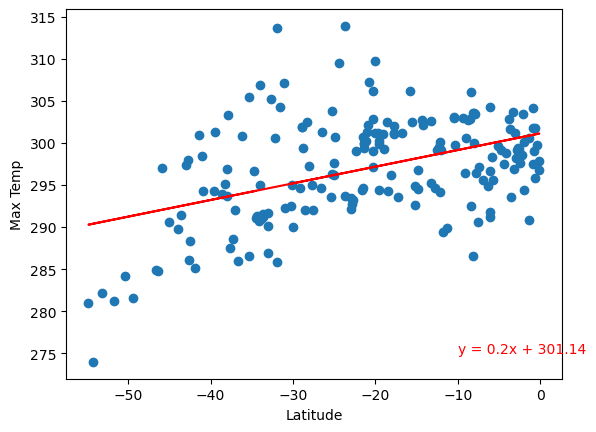

In [66]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

#Performing Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plotting the scatter plot and regression line
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

#Adding labels, title and annotation
plt.annotate(line_eq,(-10,275),fontsize=10,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue**2}")
plt.savefig(r"C:\Users\emily\OneDrive\Desktop\python_api_challenge\output_data\Fig6.png")
plt.show()

**Discussion about the linear relationship:There is a negative relationship between the Northern Hemisphere's Latitude and Max Temp. As the Latitude increases, the max temp decreases. This makes sense because higher altitudes typically experience colder weather than locations closer to the equator. There is a positive relationship in the Southern Hemisphere between Latitude and and Max temp. 

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.1944329791197621


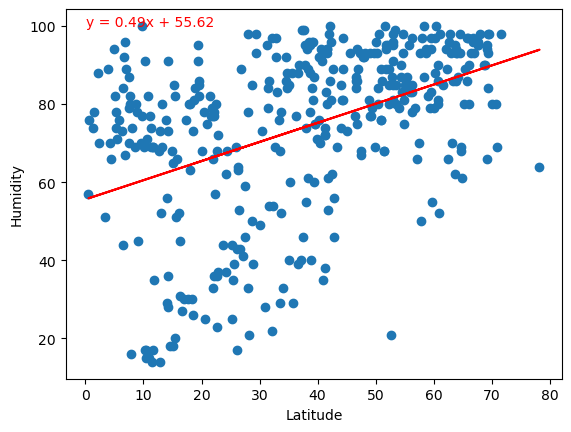

In [67]:
# Northern Hemisphere
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

#Performing Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plotting the scatter plot and regression line
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

#Adding labels, title and annotation
plt.annotate(line_eq,(0.1,100),fontsize=10,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")
plt.savefig(r"C:\Users\emily\OneDrive\Desktop\python_api_challenge\output_data\Fig7.png")
plt.show()

The r-squared is: 0.1480050003215056


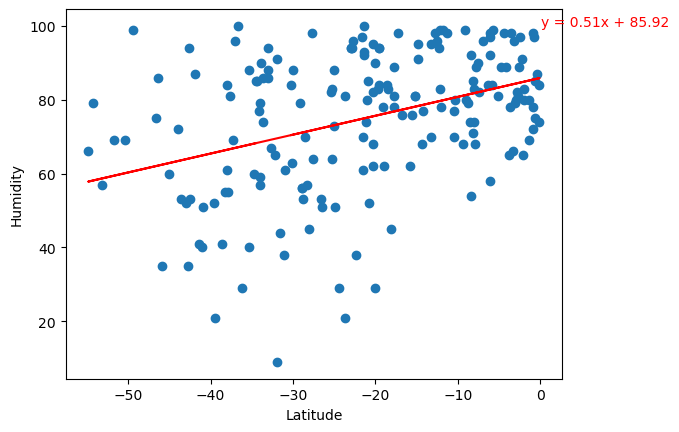

In [68]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

#Performing Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plotting the scatter plot and regression line
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

#Adding labels, title and annotation
plt.annotate(line_eq,(0.1,100),fontsize=10,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")
plt.savefig(r"C:\Users\emily\OneDrive\Desktop\python_api_challenge\output_data\Fig8.png")
plt.show()

**Discussion about the linear relationship: There is a positive relationship between Humidity and Latitude in both the Northern and Southern hemispheres. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.13196661357316972


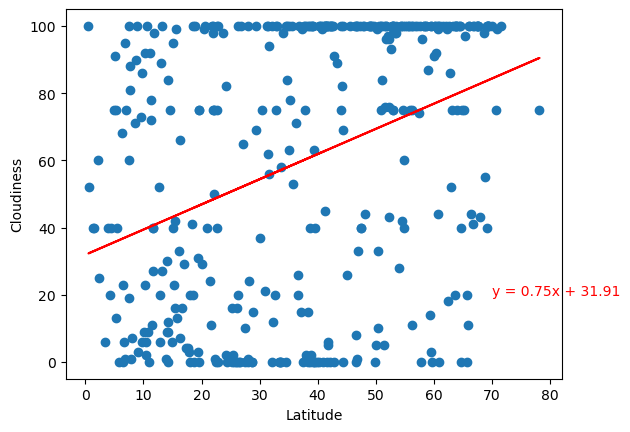

In [69]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

#Performing Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plotting the scatter plot and regression line
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

#Adding labels, title and annotation
plt.annotate(line_eq,(70,20),fontsize=10,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")
plt.savefig(r"C:\Users\emily\OneDrive\Desktop\python_api_challenge\output_data\Fig9.png")
plt.show()

The r-squared is: 0.1803988940082842


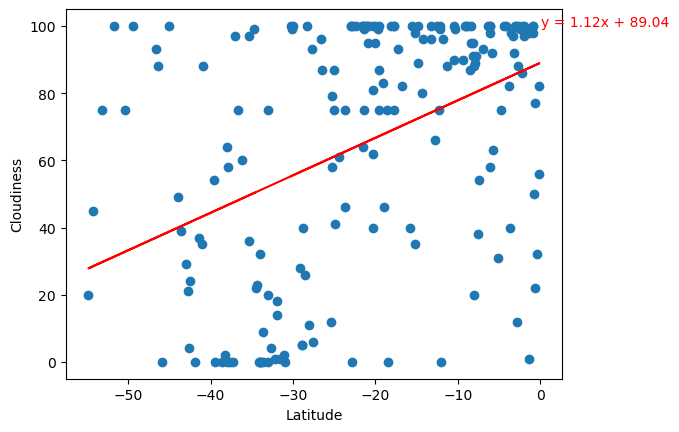

In [70]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

#Performing Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plotting the scatter plot and regression line
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

#Adding labels, title and annotation
plt.annotate(line_eq,(0.1,100),fontsize=10,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")
plt.savefig(r"C:\Users\emily\OneDrive\Desktop\python_api_challenge\output_data\Fig10.png")
plt.show()

**Discussion about the linear relationship: Latitude does not strongly correlate to Cloudiness in either the Northern or Southern Hemispheres.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.0011855572460703718


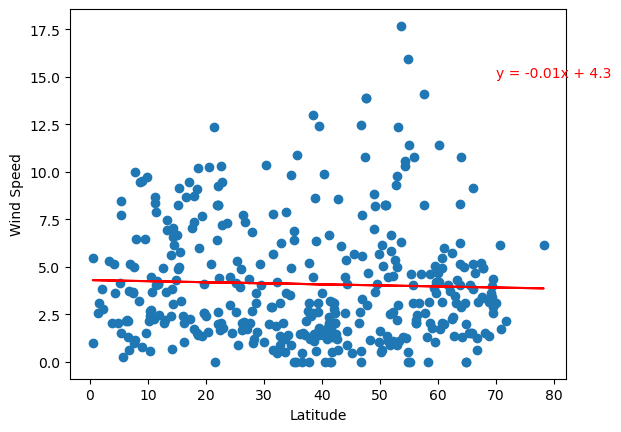

In [71]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

#Performing Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plotting the scatter plot and regression line
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

#Adding labels, title and annotation
plt.annotate(line_eq,(70,15.0),fontsize=10,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")
plt.savefig(r"C:\Users\emily\OneDrive\Desktop\python_api_challenge\output_data\Fig11.png")
plt.show()

The r-squared is: 0.1731804319923239


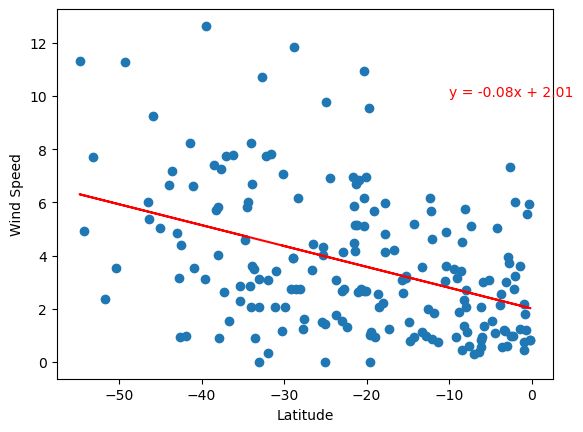

In [72]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

#Performing Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plotting the scatter plot and regression line
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

#Adding labels, title and annotation
plt.annotate(line_eq,(-10,10),fontsize=10,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")
plt.savefig(r"C:\Users\emily\OneDrive\Desktop\python_api_challenge\output_data\Fig12.png")
plt.show()

**Discussion about the linear relationship: No correlation between wind speed and latitude in Northern Hemisphere; slight negative relationship between Wind Speed and Latitude in Southern Hemisphere.